# Лабораторная работа по анализу данных продаж продукта

В данной лабораторной работе мы будем работать с файлом **«Продажа продукта.csv»**.  
Файл содержит информацию о событиях, связанных с продажами продукта, в том числе:
- идентификатор продукта,
- дату и время события,
- название события,
- код подразделения,
- номер офиса,
- пользователя, совершившего действие.

Цель работы — научиться загружать, обрабатывать и анализировать данные с помощью **Python** и библиотеки **pandas**.

##  1. Загрузка и предварительный анализ данных
Загрузите данные и отобразите первые 5 строк

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/datasets/Продажа продукта.csv", sep=';', encoding='cp1251')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df.head()

,ID_PRODUCT,EVENT_DATE,EVENT_NAME,TB_CODE,OSB_NUMBER,USER_NAME
0,1,09.01.2020 7:59:11,Вход в систему,54,8623,Аав Тыну
1,1,09.01.2020 7:59:17,Выбор операции,54,8623,Аав Тыну
2,1,09.01.2020 7:59:40,Печать договора,54,8623,Аав Тыну
3,1,09.01.2020 8:01:32,Загрузка сотрудником скана документа в систему,54,8623,Аав Тыну
4,1,09.01.2020 8:01:54,Отмена операции,54,8623,Аав Тыну


## 2. Преобразование даты и времени
Преобразуйте колонку EVENT_DATE в тип datetime и выведите 5 строк

In [14]:
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], format='%d.%m.%Y %H:%M:%S')
df.head()

,ID_PRODUCT,EVENT_DATE,EVENT_NAME,TB_CODE,OSB_NUMBER,USER_NAME
0,1,2020-01-09 07:59:11,Вход в систему,54,8623,Аав Тыну
1,1,2020-01-09 07:59:17,Выбор операции,54,8623,Аав Тыну
2,1,2020-01-09 07:59:40,Печать договора,54,8623,Аав Тыну
3,1,2020-01-09 08:01:32,Загрузка сотрудником скана документа в систему,54,8623,Аав Тыну
4,1,2020-01-09 08:01:54,Отмена операции,54,8623,Аав Тыну


## 3. Анализ событий
Проанализируйте, сколько раз встречается каждое событие

In [15]:
event_counter = df['EVENT_NAME'] = df['EVENT_NAME'].value_counts()
print(event_counter)

EVENT_NAME
Вход в систему                                        2256
Выход из системы                                      2107
Выбор операции                                        1911
Печать договора                                        894
Загрузка сотрудником скана документа в систему         808
Подтверждение сотрудником загрузки скана документа     663
Отмена операции                                        375
Превышение попыток ввода промокода Оператором            4
Name: count, dtype: int64


## 4. Активность пользователей
Выведите Топ-10 пользователей по количеству событий

In [16]:
user_events = df['USER_NAME'].value_counts().head(10)
print(user_events)

USER_NAME
Бровкин Вячеслав Владимирович      286
Барляев Владимир Алексеевич        224
Азаров Борис Иванович              192
Алекперов Шахмар Зульфугар оглы    149
Аркадин Иван Иванович              131
Багиров Гаджибаба Агарза оглы      121
Абдулов Александр Гавриилович      111
Брянцев Александр Александрович    100
Авдюшко Виктор Антонович            92
Александров Григорий Васильевич     86
Name: count, dtype: int64


## 5. Динамика событий во времени
Визуализируйте количество событий по датам

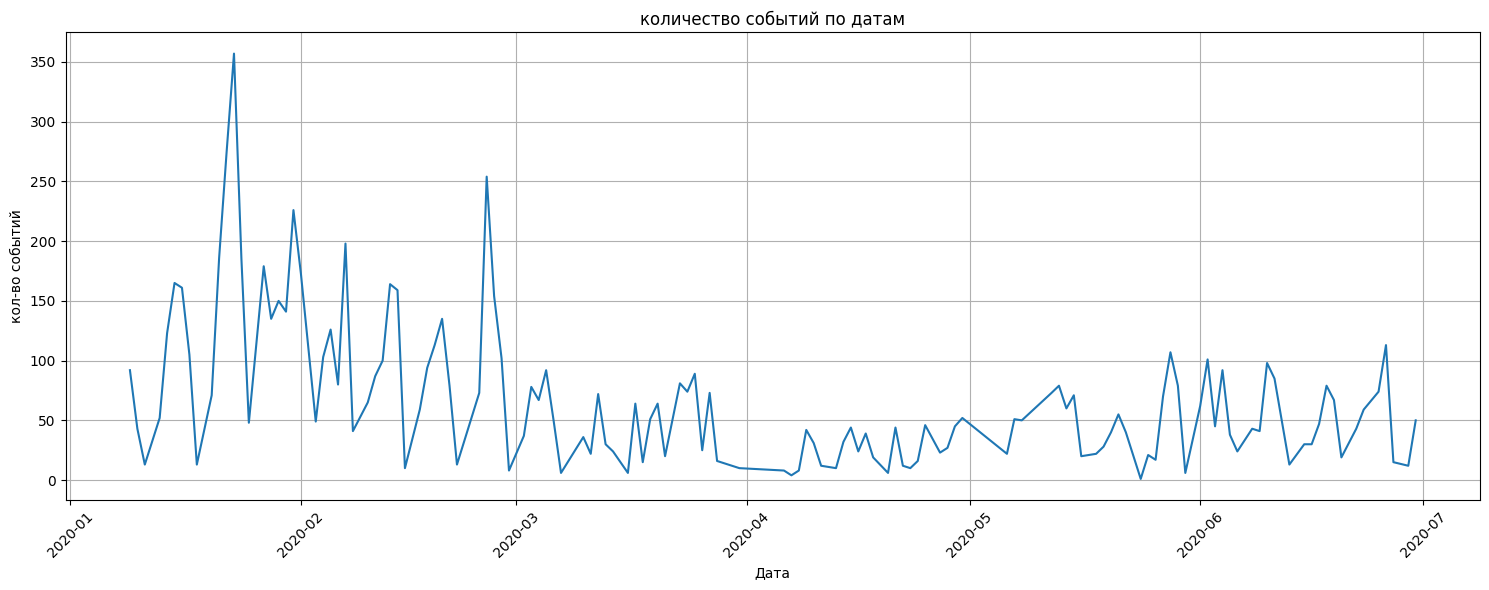

In [17]:
plt.figure(figsize=(15, 6))
daily_events = df.groupby(df['EVENT_DATE'].dt.date).size()
daily_events.plot(kind='line', title='количество событий по датам')
plt.xlabel('Дата')
plt.ylabel('кол-во событий')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Анализ по офисам
Выведите Топ-10 офисов по количесву событий

In [18]:
office_events = df['OSB_NUMBER'].value_counts().head(10)
print(office_events)

OSB_NUMBER
8612    1133
9055     998
8047     875
9013     517
9042     434
6984     403
8623     392
8634     385
8622     374
8597     337
Name: count, dtype: int64


## 7. Продвинутая аналитика: распределения и тепловые карты
Постройте тепловую карту по часам/дням недели для всех событий (Теплокарта активности: час x день недели)

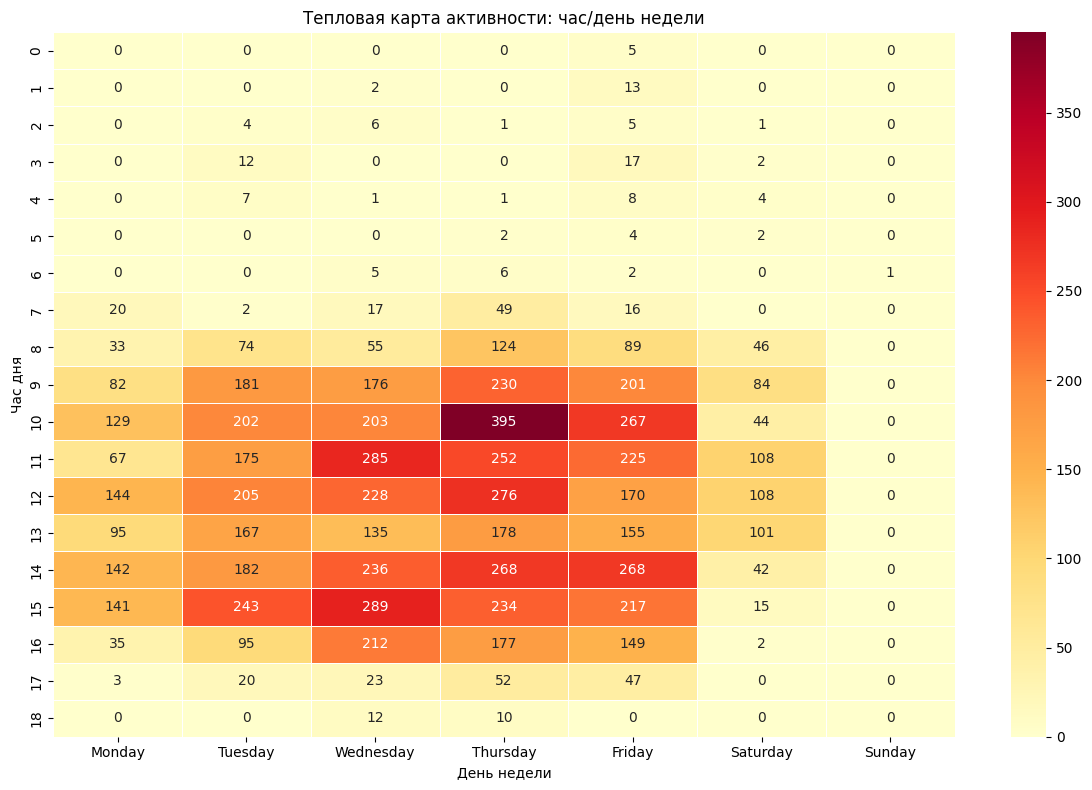

In [19]:
df['hour'] = df['EVENT_DATE'].dt.hour
df['day_of_week'] = df['EVENT_DATE'].dt.day_name()

heatmap_data = df.pivot_table(
    index='hour',
    columns='day_of_week',
    values='ID_PRODUCT',
    aggfunc='count',
    fill_value=0
)

# Упорядочивание дней недели
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=days_order)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Тепловая карта активности: час/день недели')
plt.xlabel('День недели')
plt.ylabel('Час дня')
plt.tight_layout()
plt.show()

## 8. Фанел (funnel)-аналитика
Сделайте простой 'воронка'-анализ: сколько после 'Выбор операции' доходит до 'Печать договора' в тот же день/пользователь

АНАЛИЗ КОНВЕРСИИ: ВЫБОР ОПЕРАЦИИ -> ПЕЧАТЬ ДОГОВОРА
----------------------------------------------------------------------------------------------------
Пользователей с 'Выбор операции': 530
Пользователей дошедших до 'Печать договора': 271
Конверсия: 51.1% (271/530)


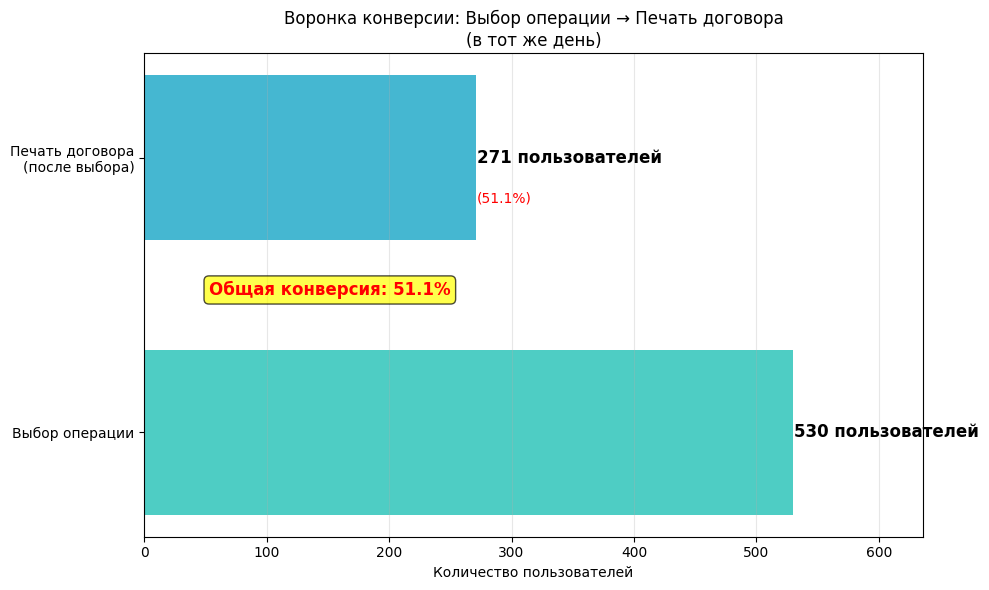

In [27]:
print("АНАЛИЗ КОНВЕРСИИ: ВЫБОР ОПЕРАЦИИ -> ПЕЧАТЬ ДОГОВОРА")
print("-" * 100)

# Создаем колонку с датой (без времени) для группировки по дням
df['DATE'] = df['EVENT_DATE'].dt.date

# Сортируем по пользователю, дате и времени
df_sorted = df.sort_values(['USER_NAME', 'DATE', 'EVENT_DATE'])

# Счетчики
users_with_choice_operation = set()
users_with_conversion = set()

# Анализируем каждого пользователя в каждый день
for (user, date), day_data in df_sorted.groupby(['USER_NAME', 'DATE']):
    events_sequence = day_data['EVENT_NAME'].tolist()

    # Проверяем, есть ли "Выбор операции" в этот день
    if 'Выбор операции' in events_sequence:
        users_with_choice_operation.add(user)

        # Находим индексы событий
        choice_indices = [i for i, event in enumerate(events_sequence) if event == 'Выбор операции']
        print_indices = [i for i, event in enumerate(events_sequence) if event == 'Печать договора']

        # Проверяем, есть ли печать договора ПОСЛЕ хотя бы одного выбора операции
        for choice_idx in choice_indices:
            for print_idx in print_indices:
                if print_idx > choice_idx:
                    users_with_conversion.add(user)
                    break
            else:
                continue
            break

# Результаты
total_users_with_choice = len(users_with_choice_operation)
total_users_with_conversion = len(users_with_conversion)
conversion_rate = total_users_with_conversion / total_users_with_choice if total_users_with_choice > 0 else 0

print(f"Пользователей с 'Выбор операции': {total_users_with_choice}")
print(f"Пользователей дошедших до 'Печать договора': {total_users_with_conversion}")
print(f"Конверсия: {conversion_rate:.1%} ({total_users_with_conversion}/{total_users_with_choice})")

# Визуализация воронки
plt.figure(figsize=(10, 6))

# Данные для воронки
stages = ['Выбор операции', 'Печать договора\n(после выбора)']
values = [total_users_with_choice, total_users_with_conversion]
colors = ['#4ECDC4', '#45B7D1']

# Создаем воронку
plt.barh(stages, values, color=colors, height=0.6)

# Добавляем значения и проценты
for i, (stage, value) in enumerate(zip(stages, values)):
    plt.text(value + 1, i, f'{value} пользователей', va='center', fontweight='bold', fontsize=12)
    if i > 0:
        prev_value = values[i-1]
        stage_conversion = value / prev_value * 100
        plt.text(value + 1, i - 0.15, f'({stage_conversion:.1f}%)', va='center', fontsize=10, color='red')

plt.xlabel('Количество пользователей')
plt.title('Воронка конверсии: Выбор операции → Печать договора\n(в тот же день)')
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, max(values) * 1.2)

# Добавляем общую конверсию
plt.text(max(values) * 0.1, 0.5, f'Общая конверсия: {conversion_rate:.1%}',
         fontsize=12, fontweight='bold', color='red',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()


## 9. Частота событий по типам и по времени суток
Визуализируйте частоту событий по типам и по времени суток

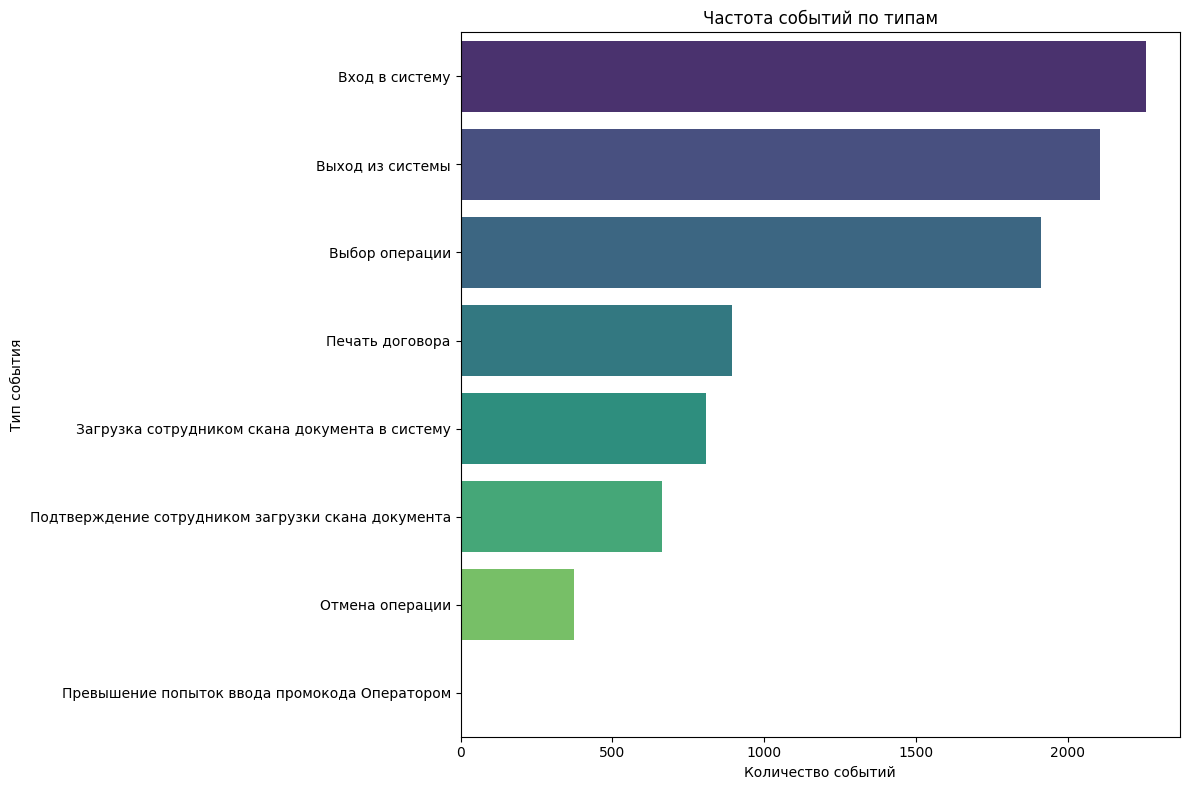

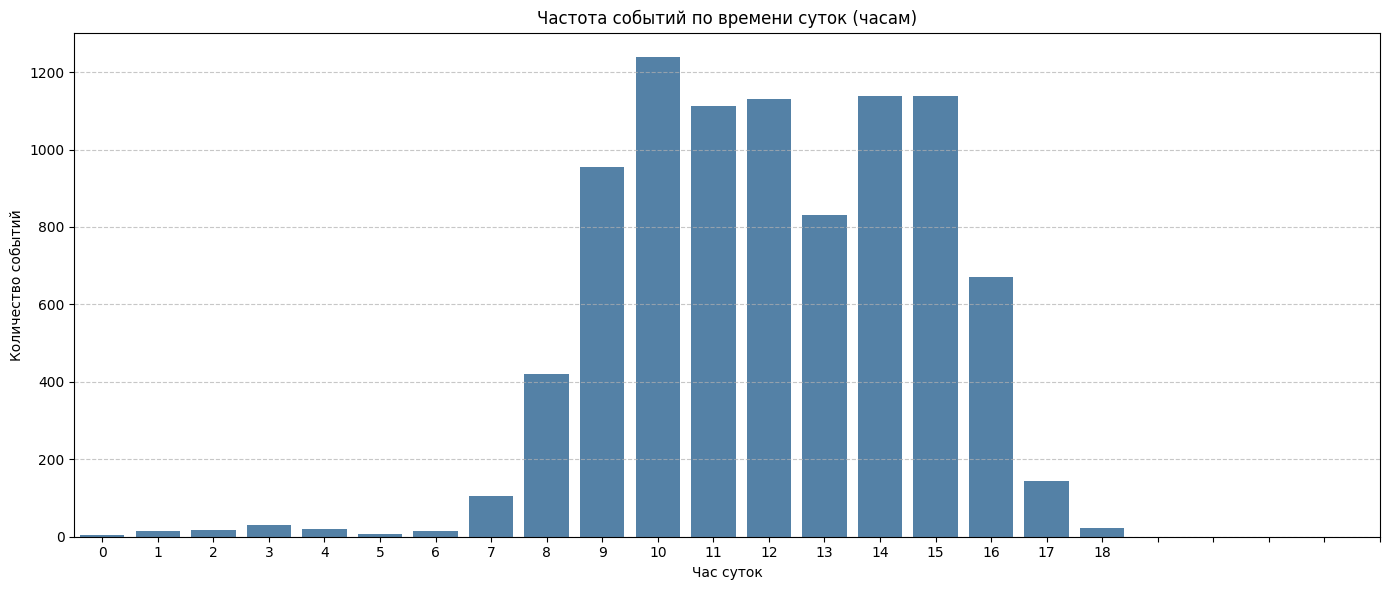

In [21]:
df = pd.read_csv("/content/drive/MyDrive/datasets/Продажа продукта.csv", sep=';', encoding='cp1251')
df['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'], format='%d.%m.%Y %H:%M:%S')


event_counts = df['EVENT_NAME'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(y=event_counts.index, x=event_counts.values, palette='viridis')
plt.title('Частота событий по типам')
plt.xlabel('Количество событий')
plt.ylabel('Тип события')
plt.tight_layout()
plt.show()


df['HOUR'] = df['EVENT_DATE'].dt.hour
hourly_counts = df['HOUR'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='steelblue')
plt.title('Частота событий по времени суток (часам)')
plt.xlabel('Час суток')
plt.ylabel('Количество событий')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 10. Сравнение пользователей внутри офисов
Для каждого офиса выведите топ-3 пользователей по числу событий

In [23]:
top_offices = df['OSB_NUMBER'].value_counts().head(10).index

for office in top_offices:
    office_users = df[df['OSB_NUMBER'] == office]['USER_NAME'].value_counts().head(3)
    print(f"\nОфис {office}:")
    for user, count in office_users.items():
        print(f"  - {user}: {count} событий")


Офис 8612:
  - Аркадин Иван Иванович: 131 событий
  - Александров Григорий Васильевич: 86 событий
  - Абрамов Анатолий Сергеевич: 82 событий

Офис 9055:
  - Бровкин Вячеслав Владимирович: 286 событий
  - Воронин Валентин Александрович: 77 событий
  - Абдульманов Рим Салимьянович: 55 событий

Офис 8047:
  - Алекперов Шахмар Зульфугар оглы: 149 событий
  - Абдулов Александр Гавриилович: 111 событий
  - Брянцев Александр Александрович: 100 событий

Офис 9013:
  - Барляев Владимир Алексеевич: 222 событий
  - Агзамов Юлдаш: 58 событий
  - Борисов Сергей Никитович: 29 событий

Офис 9042:
  - Голубович Михаил Васильевич: 35 событий
  - Бронников Андрей Андреевич: 30 событий
  - Астахов Валерий Анатольевич: 30 событий

Офис 6984:
  - Баландис Саулюс: 56 событий
  - Арипов Туйчи: 44 событий
  - Афанасьев Николай Леонидович: 42 событий

Офис 8623:
  - Айгумов Айгум Эльдарович: 51 событий
  - Аав Тыну: 49 событий
  - Васильев Вячеслав Вячеславович: 40 событий

Офис 8634:
  - Барков Дмитрий Дмитр

## 11. Тепловая карта событий по офисам и типам событий
Постройте тепловую карту событий: офис × тип события

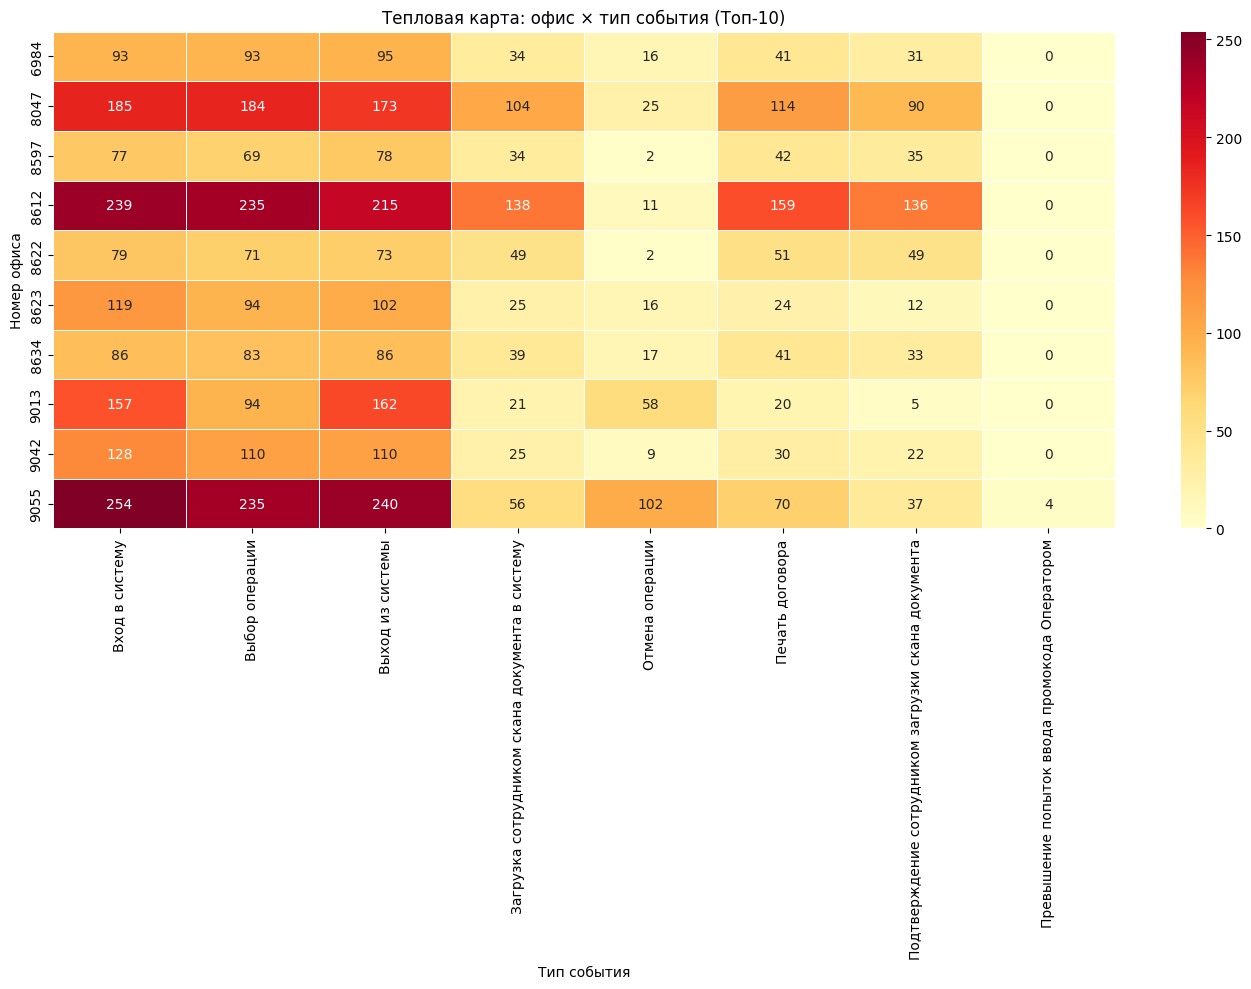

In [24]:
top_10_offices = df['OSB_NUMBER'].value_counts().head(10).index
top_10_events = df['EVENT_NAME'].value_counts().head(10).index

office_event_heatmap = df[
    (df['OSB_NUMBER'].isin(top_10_offices)) &
    (df['EVENT_NAME'].isin(top_10_events))
].pivot_table(
    index='OSB_NUMBER',
    columns='EVENT_NAME',
    values='ID_PRODUCT',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(14, 10))
sns.heatmap(office_event_heatmap, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5)
plt.title('Тепловая карта: офис × тип события (Топ-10)')
plt.xlabel('Тип события')
plt.ylabel('Номер офиса')
plt.tight_layout()
plt.show()


## 12. Прогнозирование количества событий во времени
Постройте прогноз количества событий по офисам на 14 дней

Прогноз строится для офисов: [8612, 9055, 8047, 9013, 9042]


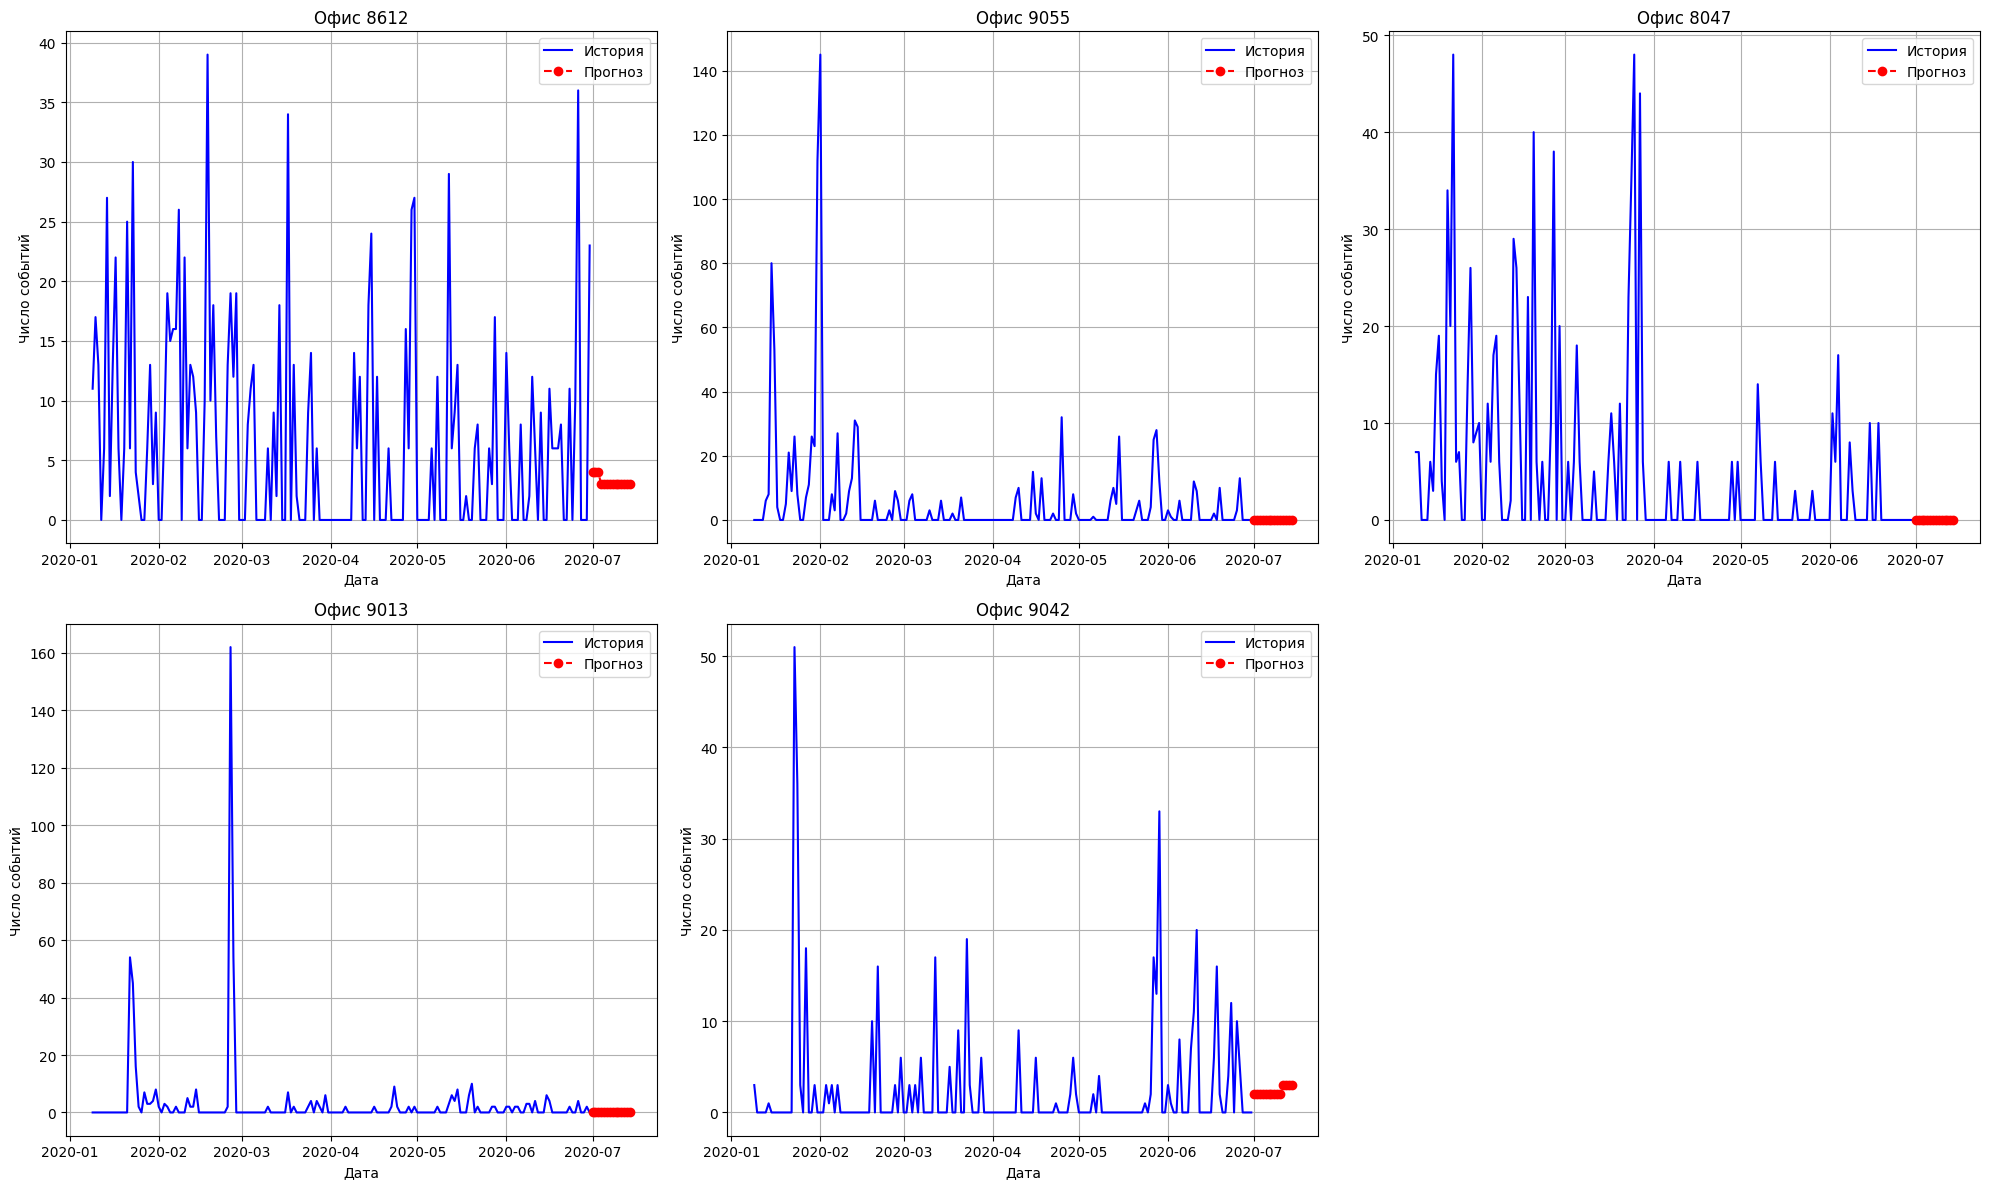


Прогноз количества событий на 14 дней:
            8612  9055  8047  9013  9042
2020-07-01     4     0     0     0     2
2020-07-02     4     0     0     0     2
2020-07-03     4     0     0     0     2
2020-07-04     3     0     0     0     2
2020-07-05     3     0     0     0     2
2020-07-06     3     0     0     0     2
2020-07-07     3     0     0     0     2
2020-07-08     3     0     0     0     2
2020-07-09     3     0     0     0     2
2020-07-10     3     0     0     0     2
2020-07-11     3     0     0     0     3
2020-07-12     3     0     0     0     3
2020-07-13     3     0     0     0     3
2020-07-14     3     0     0     0     3


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import timedelta

# Создаём колонку с датой
df['DATE'] = df['EVENT_DATE'].dt.date

# Группируем: сколько событий в день в каждом офисе
daily_office = df.groupby(['OSB_NUMBER', 'DATE']).size().reset_index(name='event_count')
daily_office['DATE'] = pd.to_datetime(daily_office['DATE'])  # для удобства

# Берём 5 самых активных офисов
top_offices = df['OSB_NUMBER'].value_counts().head(5).index.tolist()
print("Прогноз строится для офисов:", top_offices)

# Определяем временные границы
min_date = daily_office['DATE'].min()
max_date = daily_office['DATE'].max()
future_dates = pd.date_range(start=max_date + timedelta(days=1), periods=14, freq='D')
full_range = pd.date_range(start=min_date, end=future_dates[-1], freq='D')

# Подготовка графика
plt.figure(figsize=(20, 12))

# Словарь для хранения прогнозов
forecasts = {}

for idx, office in enumerate(top_offices, 1):
    # Данные только по текущему офису
    office_data = daily_office[daily_office['OSB_NUMBER'] == office].copy()
    office_data.set_index('DATE', inplace=True)

    # Восстанавливаем все дни (включая дни без событий - 0)
    full_series = office_data.reindex(full_range, fill_value=0)['event_count']

    # Разделяем историю и будущее
    hist = full_series[full_series.index <= max_date]
    future = full_series[full_series.index > max_date]

    # Подготавливаем X (дни как числа) и Y (события)
    X_hist = np.arange(len(hist)).reshape(-1, 1)
    y_hist = hist.values

    # Обучаем линейную регрессию
    model = LinearRegression()
    model.fit(X_hist, y_hist)

    # Прогноз на 14 дней
    X_future = np.arange(len(hist), len(hist) + 14).reshape(-1, 1)
    y_pred = model.predict(X_future)
    y_pred = np.clip(np.round(y_pred), 0, None)  # нет отрицательных событий

    forecasts[office] = pd.Series(y_pred, index=future_dates)

    # Визуализация
    plt.subplot(2, 3, idx)
    plt.plot(hist.index, hist.values, label='История', color='blue')
    plt.plot(future_dates, y_pred, 'o--', label='Прогноз', color='red')
    plt.title(f'Офис {office}')
    plt.xlabel('Дата')
    plt.ylabel('Число событий')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод таблицы прогноза
print("\nПрогноз количества событий на 14 дней:")
forecast_table = pd.DataFrame(forecasts)
print(forecast_table.astype(int))

## 13. Кластеризация пользователей по активности

Теперь попробуем сгруппировать пользователей с помощью алгоритма кластеризации **KMeans**.  
Признаки:  
- общее число событий;  
- количество уникальных продуктов;  
- количество дней активности;  
- среднее число событий в день;  
- доля событий «Печать договора».  

Цель: выделить сегменты пользователей (например, очень активные, умеренно активные, малоактивные).

In [ ]:
# Агрегируем данные по пользователям
user_agg = df.groupby('USER_NAME').agg({
    'ID_PRODUCT': ['count', 'nunique'],  # общее число событий и количество уникальных продуктов
    'EVENT_DATE': 'nunique',  # количество дней активности
}).reset_index()

user_agg.columns = ['USER_NAME', 'total_events', 'unique_products', 'active_days']

# Среднее число событий в день
user_agg['avg_events_per_day'] = user_agg['total_events'] / user_agg['active_days']

# Доля событий "Печать договора"
print_events = df[df['EVENT_NAME'] == 'Печать договора'].groupby('USER_NAME').size()
user_agg['print_contract_ratio'] = user_agg['USER_NAME'].map(print_events) / user_agg['total_events']
user_agg['print_contract_ratio'] = user_agg['print_contract_ratio'].fillna(0)

# Подготовка данных для кластеризации
features = ['total_events', 'unique_products', 'active_days', 'avg_events_per_day', 'print_contract_ratio']
X = user_agg[features]

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans кластеризация на 4 кластера
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
user_agg['cluster'] = kmeans.fit_predict(X_scaled)


### Визуализация кластеров
Постройте визуализацию кластеров пользователей (ось X: события, Y: уникальные продукты)"

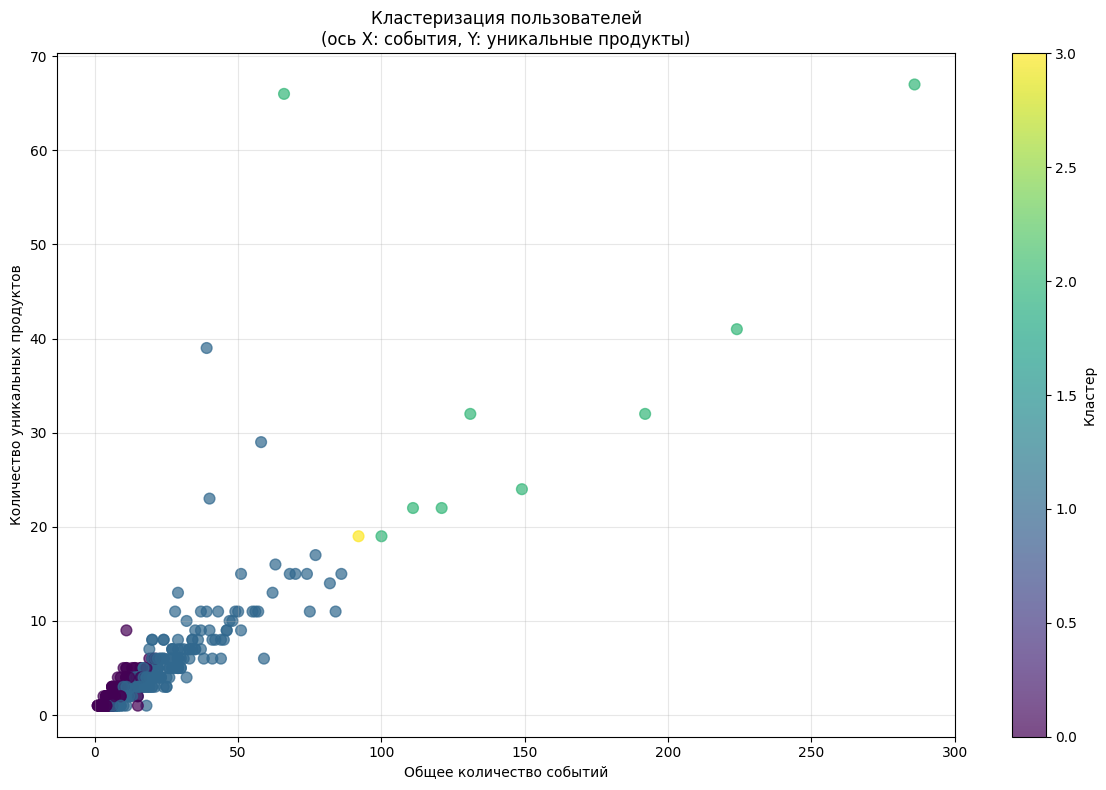

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(user_agg['total_events'],
                     user_agg['unique_products'],
                     c=user_agg['cluster'],
                     cmap='viridis',
                     alpha=0.7,
                     s=60)
plt.colorbar(scatter, label='Кластер')
plt.xlabel('Общее количество событий')
plt.ylabel('Количество уникальных продуктов')
plt.title('Кластеризация пользователей\n(ось X: события, Y: уникальные продукты)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Интерпретация кластеров
Выведите средние значения признаков по кластерам

In [ ]:
cluster_summary = user_agg.groupby('cluster')[features].mean().round(2)
print("Средние значения признаков по кластерам:")
print(cluster_summary)

Средние значения признаков по кластерам:
         total_events  unique_products  active_days  avg_events_per_day  \
cluster                                                                   
0                4.46             1.55         4.46                1.00   
1               21.40             4.71        21.40                1.00   
2              153.33            36.11       153.33                1.00   
3               92.00            19.00        91.00                1.01   

         print_contract_ratio  
cluster                        
0                        0.00  
1                        0.14  
2                        0.11  
3                        0.13  


ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ:
----------------------------------------------------------------------------------------------------

Кластер 0 (n=411):
  • Среднее количество событий: 4.5
  • Среднее количество продуктов: 1.6
  • Среднее количество дней активности: 4.5
  • Среднее событий в день: 1.0
  • Доля печати договоров: 0.02%
  • ТИП: НЕАКТИВНЫЕ

Кластер 1 (n=267):
  • Среднее количество событий: 21.4
  • Среднее количество продуктов: 4.7
  • Среднее количество дней активности: 21.4
  • Среднее событий в день: 1.0
  • Доля печати договоров: 13.74%
  • ТИП: УМЕРЕННО АКТИВНЫЕ

Кластер 2 (n=9):
  • Среднее количество событий: 153.3
  • Среднее количество продуктов: 36.1
  • Среднее количество дней активности: 153.3
  • Среднее событий в день: 1.0
  • Доля печати договоров: 11.30%
  • ТИП: ОЧЕНЬ АКТИВНЫЕ

Кластер 3 (n=1):
  • Среднее количество событий: 92.0
  • Среднее количество продуктов: 19.0
  • Среднее количество дней активности: 91.0
  • Среднее событий в день: 1.0
  • Доля печа

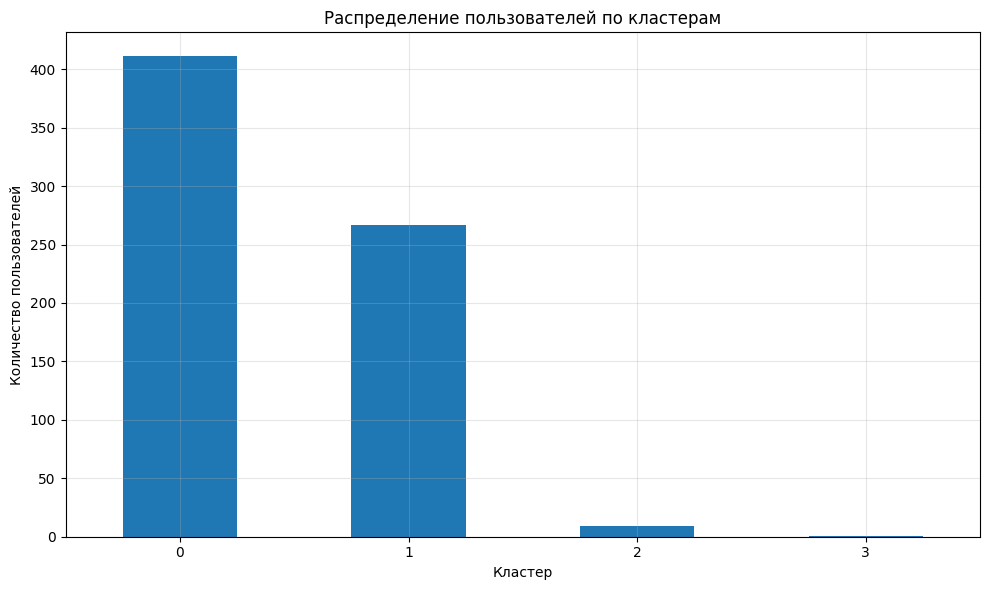

In [ ]:
print("ДЕТАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ:")
print("-" * 100)

for cluster_id in sorted(user_agg['cluster'].unique()):
    cluster_data = user_agg[user_agg['cluster'] == cluster_id]
    print(f"\nКластер {cluster_id} (n={len(cluster_data)}):")
    print(f"  • Среднее количество событий: {cluster_data['total_events'].mean():.1f}")
    print(f"  • Среднее количество продуктов: {cluster_data['unique_products'].mean():.1f}")
    print(f"  • Среднее количество дней активности: {cluster_data['active_days'].mean():.1f}")
    print(f"  • Среднее событий в день: {cluster_data['avg_events_per_day'].mean():.1f}")
    print(f"  • Доля печати договоров: {cluster_data['print_contract_ratio'].mean():.2%}")

    # Определяем тип пользователей
    if cluster_data['total_events'].mean() > 50:
        activity = "ОЧЕНЬ АКТИВНЫЕ"
    elif cluster_data['total_events'].mean() > 20:
        activity = "УМЕРЕННО АКТИВНЫЕ"
    elif cluster_data['total_events'].mean() > 5:
        activity = "МАЛОАКТИВНЫЕ"
    else:
        activity = "НЕАКТИВНЫЕ"

    print(f"  • ТИП: {activity}")

# Дополнительная визуализация - распределение по кластерам
plt.figure(figsize=(10, 6))
user_agg['cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Распределение пользователей по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()